<a href="https://colab.research.google.com/github/Anas-art-source/AI_experiments/blob/main/Store_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
train =pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
oil=pd.read_csv("oil.csv")
stores=pd.read_csv("stores.csv")
transactions=pd.read_csv("transactions.csv")
holidays=pd.read_csv("holidays_events.csv")

EDA

In [64]:
train.head(10)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0
5,5,2013-01-01,1.0,BREAD/BAKERY,0.0,0.0
6,6,2013-01-01,1.0,CELEBRATION,0.0,0.0
7,7,2013-01-01,1.0,CLEANING,0.0,0.0
8,8,2013-01-01,1.0,DAIRY,0.0,0.0
9,9,2013-01-01,1.0,DELI,0.0,0.0


In [65]:
train.tail(10)


,id,date,store_nbr,family,sales,onpromotion
267800,267800,2013-05-31,23.0,BREAD/BAKERY,237.972,0.0
267801,267801,2013-05-31,23.0,CELEBRATION,0.000,0.0
267802,267802,2013-05-31,23.0,CLEANING,540.000,0.0
267803,267803,2013-05-31,23.0,DAIRY,309.000,0.0
267804,267804,2013-05-31,23.0,DELI,177.377,0.0
267805,267805,2013-05-31,23.0,EGGS,46.000,0.0
267806,267806,2013-05-31,23.0,FROZEN FOODS,33.000,0.0
267807,267807,2013-05-31,23.0,GROCERY I,1737.000,0.0
267808,267808,2013-05-31,23.0,GROCERY II,17.000,0.0
267809,267,NaN,NaN,NaN,NaN,NaN


In [5]:
len(pd.unique(train['store_nbr']))


55

<Axes: xlabel='store_nbr', ylabel='sales'>

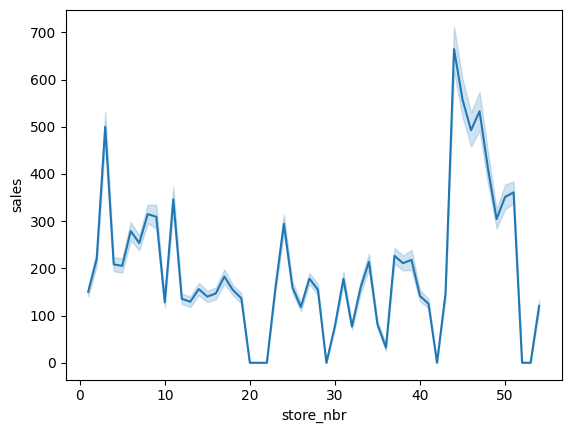

In [6]:
sns.lineplot(x='store_nbr',y='sales',data=train)


In [7]:
len(pd.unique(train['family']))


34

<Axes: xlabel='store_nbr', ylabel='sales'>

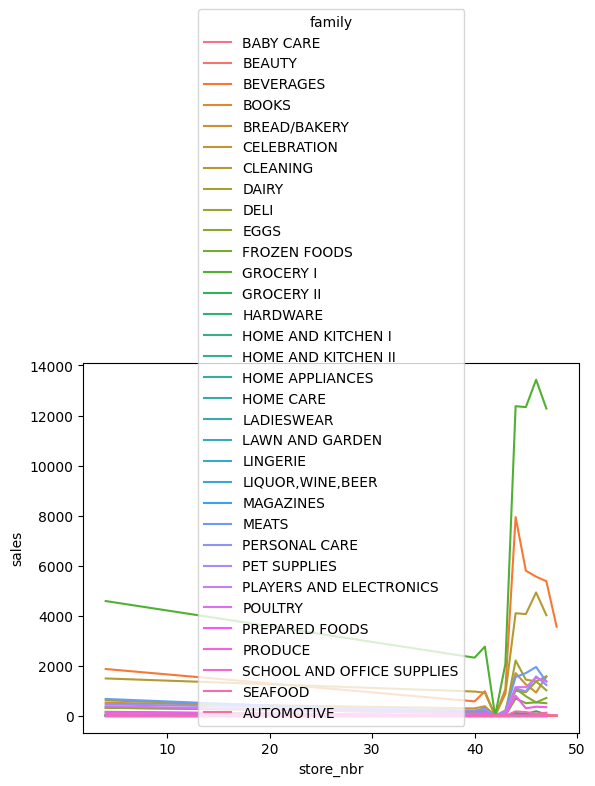

In [8]:
sns.lineplot(x="store_nbr", y="sales",
             hue="family",
             data=train[10000:10300])

In [9]:
# Metadata about store for categorical features
stores.head()


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
transactions.head()


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
# Oil prices to be used as a features since it has impact of overall economical wellbeing and purchasing power of customers
oil.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [66]:
holidays[holidays['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [68]:
holidays[holidays['description']== 'Independencia de Guayaquil']

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
190,2015-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False
274,2016-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False
331,2017-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False


In [69]:
holidays[holidays['type']== 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [70]:
holidays[holidays['type']== 'Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


In [71]:
holidays[holidays['type']== 'Work Day']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [74]:
holidays[holidays['date'] == '2013-01-05']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False


In [83]:
def holiday(row):
  if row['transferred'] == False:
    return 1

  if row['type'] == 'Bridge':
    return 1

  return 0

def work_day(row):
  if row['type'] == "Work Day":
    return 0
  return row['is_actual_holiday']

def bridge_day(row):
  if row['type'] == 'Bridge':
    return 1
  return row['is_actual_holiday']


holidays['is_actual_holiday'] = holidays.apply(holiday,axis=1)
holidays['is_actual_holiday'] = holidays.apply(work_day,axis=1)
holidays['is_actual_holiday'] = holidays.apply(bridge_day,axis=1)



In [84]:
holidays.head()

,date,type,locale,locale_name,description,transferred,is_actual_holiday
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,1
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,1
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,1
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,1


In [85]:
holidays[holidays['type'] == 'Work Day']

,date,type,locale,locale_name,description,transferred,is_actual_holiday
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,0
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,0
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False,0
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False,0
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False,0


In [86]:
holidays[holidays['type'] == 'Bridge']

,date,type,locale,locale_name,description,transferred,is_actual_holiday
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False,1
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False,1
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False,1
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False,1
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False,1


EDA - Transaction

<Axes: xlabel='date', ylabel='transactions'>

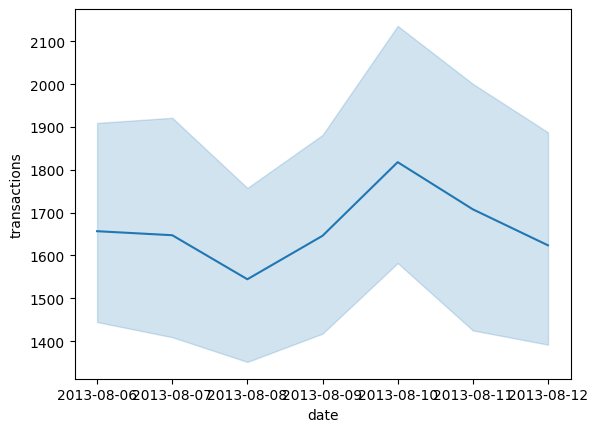

In [87]:
# Exploring transactions dataframe¶
sns.lineplot(x='date',y='transactions',data=transactions[10000:10300])


In [14]:
train_merged = pd.merge(train, transactions, on=['date', 'store_nbr'], how='left')


<Axes: xlabel='date', ylabel='transactions'>

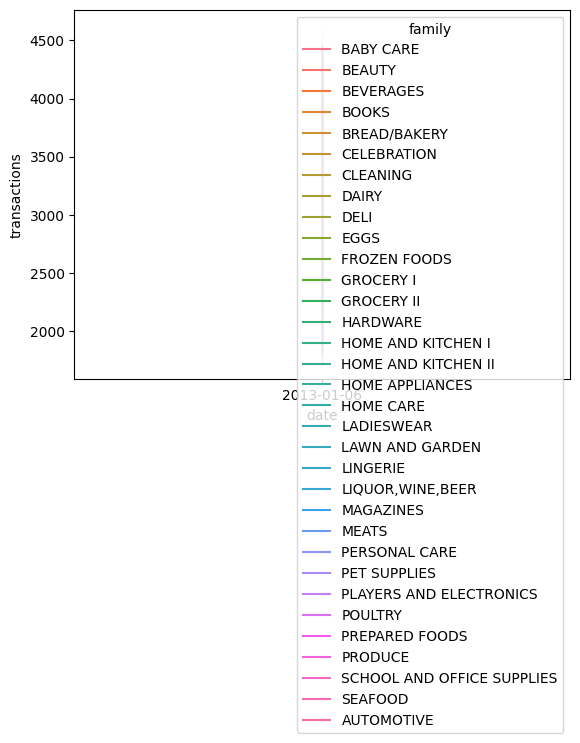

In [15]:
sns.lineplot(x='date',y='transactions',data=train_merged[10000:10300],hue='family')


In [16]:
print('Null values in merged dataframe: ',train_merged['transactions'].isnull().sum())
print('Total entries in transactions: ',len(transactions))

Null values in merged dataframe:  40459
Total entries in transactions:  83488


Observation: There are a lot of Null values hence, we either have to remove these rows or replace with new value¶


Merging rest of the dataframes¶


In [17]:
train_merged = pd.merge(train_merged, oil, on=['date'], how='left')


Holidays dataframe¶


In [18]:
print('No. of rows:',len(holidays))
print('No. of unique dates:',len(pd.unique(holidays['date'])))

No. of rows: 350
No. of unique dates: 312


Because no of total entries > no. of dates that means the dates have been repeated


In [19]:
holidays_unique = holidays.groupby(by='date').agg({'transferred':'max'})
train_merged = pd.merge(train_merged, holidays_unique, on=['date'], how='left')

In [20]:
train_merged = pd.merge(train_merged, stores, on=['store_nbr'], how='left')


In [21]:
train_merged.rename(columns = {'dcoilwtico':'oilprices'}, inplace = True)


Correcting date datatype

In [22]:
train_merged['date'] = pd.to_datetime(train_merged['date'])


In [72]:
train_merged.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,oilprices,transferred,city,state,type,cluster,family_encoded,state_encoded,type_encoded
561,561,2013-01-01,25.0,AUTOMOTIVE,0.0,0.0,770.0,93.14,False,Salinas,Santa Elena,D,1.0,0,13,3
562,562,2013-01-01,25.0,BABY CARE,0.0,0.0,770.0,93.14,False,Salinas,Santa Elena,D,1.0,1,13,3
563,563,2013-01-01,25.0,BEAUTY,2.0,0.0,770.0,93.14,False,Salinas,Santa Elena,D,1.0,2,13,3
564,564,2013-01-01,25.0,BEVERAGES,810.0,0.0,770.0,93.14,False,Salinas,Santa Elena,D,1.0,3,13,3
565,565,2013-01-01,25.0,BOOKS,0.0,0.0,770.0,93.14,False,Salinas,Santa Elena,D,1.0,4,13,3


In [23]:
train_merged.describe()


,id,store_nbr,sales,onpromotion,transactions,oilprices,cluster
count,267810.000000,267809.000000,267809.000000,267809.0,227351.000000,184055.000000,267809.000000
mean,133903.501001,27.474935,200.672094,0.0,1693.921060,93.890486,8.486040
std,77310.230402,15.583878,678.281979,0.0,903.934681,2.369181,4.650294
min,0.000000,1.000000,0.000000,0.0,374.000000,86.650000,1.000000
25%,66951.250000,14.000000,0.000000,0.0,1072.000000,92.760000,4.000000
50%,133903.500000,27.000000,0.000000,0.0,1412.000000,93.840000,9.000000
75%,200855.750000,41.000000,91.641000,0.0,2154.000000,95.800000,13.000000
max,267808.000000,54.000000,26067.000000,0.0,6328.000000,97.980000,17.000000


In [24]:
train_merged.head()


,id,date,store_nbr,family,sales,onpromotion,transactions,oilprices,transferred,city,state,type,cluster
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0


Exploring Null values


Now, to remove Null values we can either replace the values with mean/median or drop the entry entirely
In case of transactions, we have to replace with 0 as no transactions were recorded on that day/ we ignore and not use as training data

In [25]:
train_merged.isna()


,id,date,store_nbr,family,sales,onpromotion,transactions,oilprices,transferred,city,state,type,cluster
0,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267805,False,False,False,False,False,False,False,False,True,False,False,False,False
267806,False,False,False,False,False,False,False,False,True,False,False,False,False
267807,False,False,False,False,False,False,False,False,True,False,False,False,False
267808,False,False,False,False,False,False,False,False,True,False,False,False,False


For oil prices

<Axes: xlabel='date', ylabel='dcoilwtico'>

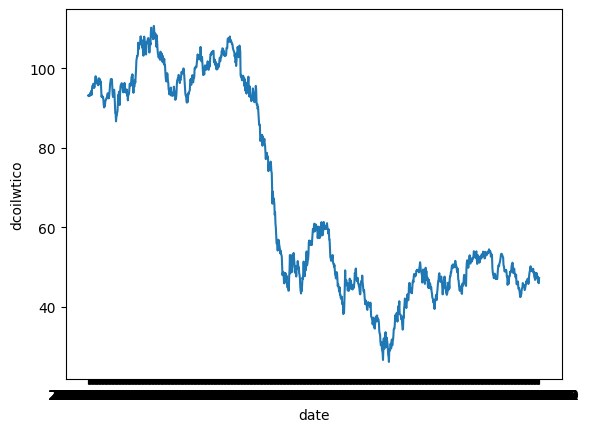

In [26]:
sns.lineplot(x='date',y='dcoilwtico',data=oil)


In [27]:
oil.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


Because, from day to day oil prices don't take a huge change hence, we replace the NA values with that of the previous day/ next day

In [28]:
train_merged.head()


,id,date,store_nbr,family,sales,onpromotion,transactions,oilprices,transferred,city,state,type,cluster
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,NaN,NaN,False,Quito,Pichincha,D,13.0


In [29]:
train_merged.isnull().sum()


id                   0
date                 1
store_nbr            1
family               1
sales                1
onpromotion          1
transactions     40459
oilprices        83755
transferred     241080
city                 1
state                1
type                 1
cluster              1
dtype: int64

In [30]:
#Replace with previous day
train_merged['oilprices']=train_merged['oilprices'].ffill()

In [31]:
train_merged['oilprices'].isnull().sum()


1782

In [32]:
#With next day
train_merged['oilprices']=train_merged['oilprices'].bfill()

In [33]:
train_merged.isnull().sum()


id                   0
date                 1
store_nbr            1
family               1
sales                1
onpromotion          1
transactions     40459
oilprices            0
transferred     241080
city                 1
state                1
type                 1
cluster              1
dtype: int64

The Null values have been handled for the relevant columns

**Modeling**

Encoding categorical values

In [44]:
le = LabelEncoder()
train_merged['family_encoded'] = le.fit_transform(train_merged['family'])
train_merged['state_encoded'] = le.fit_transform(train_merged['state'])
train_merged['type_encoded'] = le.fit_transform(train_merged['type'])

train_merged = train_merged.dropna()

Selecting important features

In [45]:
X = train_merged[['store_nbr', 'family_encoded', 'onpromotion', 'oilprices', 'state_encoded', 'type_encoded', 'cluster']]
y = train_merged['sales']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model 1: XGBRegressor

In [47]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
import numpy as np
y_pred1 = model.predict(X_test)

# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print('Root mean square error for model 1: ',rmse)

Root mean square error for model 1:  209.81077470002555


Evaluation parameter for this competition: RMSLE


In [49]:
# RMSLE defination
def rmsle(y_true, y_pred):
    """
    Calculate Root Mean Squared Logarithmic Error (RMSLE) between y_true and y_pred
    """
    log_error = np.log1p(y_pred) - np.log1p(y_true)
    squared_log_error = np.square(log_error)
    mean_squared_log_error = np.mean(squared_log_error)
    rmsle_score = np.sqrt(mean_squared_log_error)
    return rmsle_score

rmsle_score = rmsle(y_test, y_pred1)

In [50]:
print('RMSLE for model 1: ',rmsle_score)


RMSLE for model 1:  1.791286336453515


The RMSLE score for model 1 is not good hence, I will use Random forest next¶


In [51]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred2 = rf_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print('Root mean square error for model 2: ',rmse)

Root mean square error for model 2:  253.12521429394758


In [53]:
rmsle_score = rmsle(y_test, y_pred2)

In [54]:
print('RMSLE for model 2: ',rmsle_score)


RMSLE for model 2:  0.550801428931093


The score for Random Forest is far better than the previous model¶


**For test dataset**

Merging datasets¶


In [55]:
test_merged = pd.merge(test, transactions, on=['date', 'store_nbr'], how='left')

test_merged = pd.merge(test_merged, oil, on=['date'], how='left')

holidays_unique = holidays.groupby(by='date').agg({'transferred':'max'})
test_merged = pd.merge(test_merged, holidays_unique, on=['date'], how='left')

test_merged = pd.merge(test_merged, stores, on=['store_nbr'], how='left')

In [56]:
test_merged.rename(columns = {'dcoilwtico':'oilprices'}, inplace = True)


In [57]:
test_merged['date'] = pd.to_datetime(test_merged['date'])


In [58]:
test_merged.isnull().sum()


id                  0
date                0
store_nbr           0
family              0
onpromotion         0
transactions    28512
oilprices        7128
transferred     26730
city                0
state               0
type                0
cluster             0
dtype: int64

Following the exact same steps as followed with the train dataframe to ready dataset and handle Null values¶


In [59]:
#Replace with previous day
test_merged['oilprices']=test_merged['oilprices'].ffill()
test_merged['oilprices'].isnull().sum()

0

In [60]:
#With next day
test_merged['oilprices']=train_merged['oilprices'].bfill()
test_merged.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
transactions    28512
oilprices       25443
transferred     26730
city                0
state               0
type                0
cluster             0
dtype: int64

In [61]:
le = LabelEncoder()
test_merged['family_encoded'] = le.fit_transform(test_merged['family'])
test_merged['state_encoded'] = le.fit_transform(test_merged['state'])
test_merged['type_encoded'] = le.fit_transform(test_merged['type'])

In [62]:
test_merged.head()


,id,date,store_nbr,family,onpromotion,transactions,oilprices,transferred,city,state,type,cluster,family_encoded,state_encoded,type_encoded
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,Quito,Pichincha,D,13,0,12,3
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,Quito,Pichincha,D,13,1,12,3
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,Quito,Pichincha,D,13,2,12,3
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,Quito,Pichincha,D,13,3,12,3
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,Quito,Pichincha,D,13,4,12,3


Predicting value in already trained model¶


In [63]:
X = test_merged[['store_nbr', 'family_encoded', 'onpromotion', 'oilprices', 'state_encoded', 'type_encoded', 'cluster']]
y_pred = rf_regressor.predict(X)
test_merged['sales']=y_pred

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values